In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_validate
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score,  accuracy_score, classification_report

# σπορά για την παραγωγή των ψευδοτυχαίων αριθμών (για την αναπαραγωγισημότητα
# των αποτελεσμάτων).
seed_value = 42 

## Import Canadian Dataset

In [15]:
df.rename({"label": "class"},inplace=True, axis =1)
df.columns

Index(['video_id', 'title', 'views', 'likes', 'dislikes', 'comment_count',
       'days_till_trending', 'number_of_tags',
       'title_number_of_trending_times', 'video_id_number_of_trending_times',
       'title_dislikedf', 'video_id_likedf', 'video_id_dislikedf',
       'title_tagsdif', 'video_id_tagsdif', 'title_time_dif',
       'title_views_dif', 'video_id_time_dif', 'video_id_views_dif',
       'title_comment_count_dif', 'video_id_comment_count_dif',
       'comments_to_views', 'likes_to_dislikes', 'class'],
      dtype='object')

In [50]:
os.getcwd()
os.chdir('D:\PhD_Material\PhD_MSc\Machine_Learning\ML_Homeworks\Homework_2\Data')
print(os.listdir()[2])
df = pd.read_csv('Model_Dataset.csv')
df.rename({"label": "class"},inplace=True, axis =1)
df.columns

data_with_labels.csv


Index(['video_id', 'title', 'views', 'likes', 'dislikes', 'comment_count',
       'days_till_trending', 'number_of_tags',
       'title_number_of_trending_times', 'video_id_number_of_trending_times',
       'title_dislikedf', 'video_id_likedf', 'video_id_dislikedf',
       'title_tagsdif', 'video_id_tagsdif', 'title_time_dif',
       'title_views_dif', 'video_id_time_dif', 'video_id_views_dif',
       'title_comment_count_dif', 'video_id_comment_count_dif',
       'comments_to_views', 'likes_to_dislikes', 'class'],
      dtype='object')

In [51]:
df = df.drop_duplicates('title',keep ='last')

In [52]:
df = df.drop_duplicates('video_id',keep ='last')

In [53]:
df.reset_index(drop=True, inplace= True)

In [54]:
df = df[[ 'views', 'likes', 'dislikes', 'comment_count','days_till_trending', 'number_of_tags',
       'title_number_of_trending_times', 'video_id_number_of_trending_times',
       'title_dislikedf', 'video_id_likedf', 'video_id_dislikedf',
       'title_tagsdif', 'video_id_tagsdif', 'title_time_dif',
       'title_views_dif', 'video_id_time_dif', 'video_id_views_dif',
       'title_comment_count_dif', 'video_id_comment_count_dif','class']]

In [66]:
df.shape

(22884, 20)

In [55]:
train_set_random,  test_set_random = train_test_split(df.copy(), test_size = 0.3, random_state= seed_value)
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = seed_value)
for train_index,test_index in split.split(df,df["class"]):
    train_set_strat = df.copy().loc[train_index]
    test_set_strat = df.copy().loc[test_index]
    

In [56]:
Overall = []
Random_Train = []
Stratified_Train = []
Random_Error = []
Strat_Error = []
for i in range(4):
    Overall.append((df["class"].value_counts()/len(df))[i])
    Random_Train.append((train_set_random["class"].value_counts()/len(train_set_random))[i])
    Stratified_Train.append((train_set_strat["class"].value_counts()/len(train_set_strat))[i])
    Random_Error.append((Overall[i]-Random_Train[i])/Overall[i]*100)
    Strat_Error.append((Overall[i]-Stratified_Train[i])/Overall[i]*100)
Class = np.array([0, 1 , 2, 3]).reshape(4,1)
Overall = np.array(Overall).reshape(4,1)
Random_Train = np.array(Random_Train).reshape(4,1)
Stratified_Train = np.array(Stratified_Train).reshape(4,1)
Random_Error = np.array(Random_Error).reshape(4,1)
Strat_Error = np.array(Strat_Error).reshape(4,1)
data_prep = np.concatenate((Class, Overall,Stratified_Train,Random_Train,Strat_Error,Random_Error,),axis = 1)
headers = ["Class", "Overall", "Stratified", "Random", "Strat_%Error", "Random_%Erro"]
df_prep = pd.DataFrame(data_prep,columns = headers)
df_prep

,Class,Overall,Stratified,Random,Strat_%Error,Random_%Erro
0,0.0,0.205690,0.205706,0.202522,-0.008030,1.539894
1,1.0,0.321709,0.321701,0.322512,0.002768,-0.249505
2,2.0,0.268048,0.268073,0.270571,-0.009652,-0.941275
3,3.0,0.204553,0.204520,0.204395,0.016370,0.077410


In [57]:
train_set = train_set_strat.copy()
test_set =test_set_strat.copy()
train_set_data = train_set.copy().drop(columns = 'class')
train_set_labels = train_set.copy()["class"]
test_set_data = test_set.copy().drop(columns = 'class')
test_set_labels = test_set.copy()["class"]

## We tested out 3 classifiers and ranked them: 
    

### A. Naive Bays classifier

In [58]:
response_accuracy = {}
response_f1_score = {}
# Import submodule.
from sklearn.naive_bayes import GaussianNB
# Initialize the gnb classifier object.
gnb = GaussianNB()
# Fit the training data to the classifier, in this case it is the evaluation of the mean and the std of each feature.
model = gnb.fit(train_set_data, train_set_labels)
y_pred = model.predict(test_set_data)
print(classification_report(test_set_labels, y_pred))
# Estimate the accuracy and the f1_score.
response_accuracy['gaussia naive bayes'] = round(gnb.score(test_set_data, test_set_labels),3)
response_f1_score['gaussian naive bayes'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)

              precision    recall  f1-score   support

         0.0       0.53      0.98      0.69      1412
         1.0       0.96      0.07      0.14      2209
         2.0       0.50      0.09      0.15      1840
         3.0       0.29      0.78      0.42      1405

    accuracy                           0.41      6866
   macro avg       0.57      0.48      0.35      6866
weighted avg       0.61      0.41      0.31      6866



### Β. Support-Vector-Machine Classifier

In [59]:
from sklearn.svm import SVC # "Support vector classifier"
svmC = SVC()
svmC.fit(train_set_data, train_set_labels)
y_pred = svmC.predict(test_set_data)
response_accuracy['SVC'] = round(svmC.score(test_set_data, test_set_labels),3)
response_f1_score['SVC'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)


### C. MLP Classifier

In [60]:
from sklearn.neural_network import MLPClassifier

mlpClf = MLPClassifier()
mlpClf.fit(train_set_data, train_set_labels)
y_pred = mlpClf.predict(test_set_data)
response_accuracy['MLP'] = round(mlpClf.score(test_set_data, test_set_labels),3)
response_f1_score['MLP'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)
print(classification_report(test_set_labels, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.21      0.35      1412
         1.0       0.64      0.98      0.78      2209
         2.0       0.41      0.64      0.50      1840
         3.0       0.78      0.18      0.29      1405

    accuracy                           0.57      6866
   macro avg       0.71      0.50      0.48      6866
weighted avg       0.68      0.57      0.51      6866



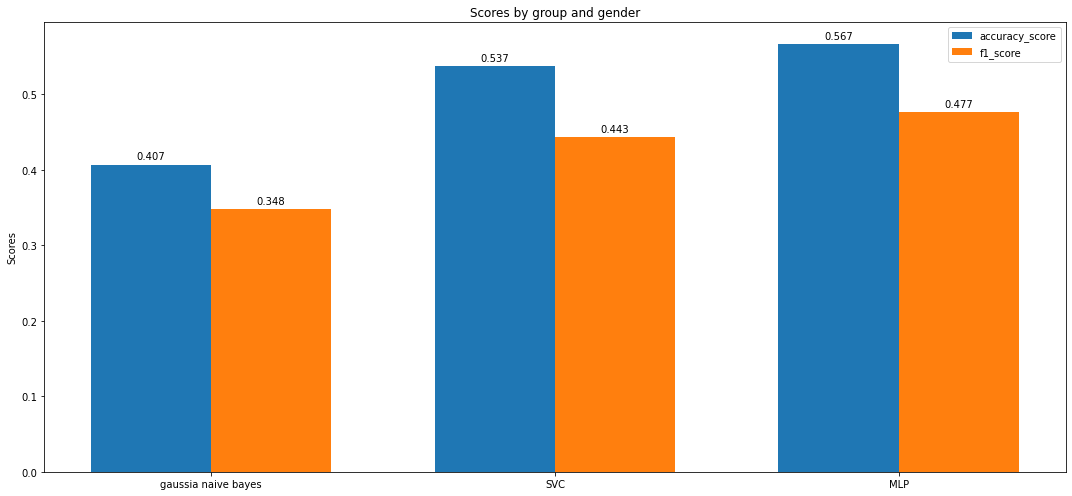

In [61]:
accuracy_sorted_keys = sorted(response_accuracy, key=response_accuracy.get)  # [1, 3, 2]
accuracy_sorted_dict = {}
for w in accuracy_sorted_keys:
    accuracy_sorted_dict[w] = response_accuracy[w]

names = list(accuracy_sorted_dict.keys())
accuracy_values = list(accuracy_sorted_dict.values())
f1score_sorted_keys = sorted(response_f1_score, key=response_f1_score.get)  # [1, 3, 2]
f1score_sorted_dict = {}
for w in f1score_sorted_keys:
    f1score_sorted_dict[w] = response_f1_score[w]
    
f1_score_values = list(f1score_sorted_dict.values())
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,7))
rects1 = ax.bar(x - width/2, accuracy_values, width, label='accuracy_score')
rects2 = ax.bar(x + width/2, f1_score_values, width, label='f1_score')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

# Optimization

In [46]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\orfea\AppData\Local\Temp/ipykernel_5808/2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)
C:\Users\orfea\anaconda3\envs\Machine_Learning\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\orfea\anaconda3\envs\Machine_Learning\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,days_till_trending,number_of_tags,title_number_of_trending_times,video_id_number_of_trending_times,title_dislikedf,video_id_likedf,video_id_dislikedf,title_tagsdif,video_id_tagsdif,title_time_dif,title_views_dif,video_id_time_dif,video_id_views_dif,title_comment_count_dif,video_id_comment_count_dif,class
days_till_trending,1.00,-0.02,0.02,0.02,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,nan,-0.00,-0.00,-0.00,-0.02
number_of_tags,-0.02,1.00,0.00,0.00,0.01,-0.01,0.01,0.03,0.04,0.01,0.01,nan,0.01,0.00,0.01,0.06
title_number_of_trending_times,0.02,0.00,1.00,0.97,0.14,0.32,0.14,0.02,0.01,0.03,0.38,nan,0.37,0.25,0.24,0.20
video_id_number_of_trending_times,0.02,0.00,0.97,1.00,0.14,0.33,0.14,0.02,0.02,-0.01,0.38,nan,0.38,0.25,0.25,0.20
title_dislikedf,-0.00,0.01,0.14,0.14,1.00,0.47,1.00,0.01,0.00,-0.02,0.53,nan,0.53,0.30,0.30,0.01
video_id_likedf,-0.00,-0.01,0.32,0.33,0.47,1.00,0.47,0.01,0.01,-0.00,0.75,nan,0.76,0.67,0.68,0.18
video_id_dislikedf,-0.00,0.01,0.14,0.14,1.00,0.47,1.00,0.00,0.00,-0.00,0.53,nan,0.53,0.30,0.30,0.01
title_tagsdif,0.00,0.03,0.02,0.02,0.01,0.01,0.00,1.00,0.75,-0.18,0.01,nan,0.01,0.01,0.01,0.00
video_id_tagsdif,0.00,0.04,0.01,0.02,0.00,0.01,0.00,0.75,1.00,-0.00,0.01,nan,0.02,0.01,0.02,0.01
title_time_dif,-0.00,0.01,0.03,-0.01,-0.02,-0.00,-0.00,-0.18,-0.00,1.00,-0.00,nan,-0.00,-0.00,-0.00,-0.01


## 1. Data Pre-Processing

### a. Missing Values : The data set does not have any missing values

In [21]:
df.isna().sum()

views                                0
likes                                0
dislikes                             0
comment_count                        0
days_till_trending                   0
number_of_tags                       0
title_number_of_trending_times       0
video_id_number_of_trending_times    0
title_dislikedf                      0
video_id_likedf                      0
video_id_dislikedf                   0
title_tagsdif                        0
video_id_tagsdif                     0
title_time_dif                       0
title_views_dif                      0
video_id_time_dif                    0
video_id_views_dif                   0
title_comment_count_dif              0
video_id_comment_count_dif           0
comments_to_views                    0
likes_to_dislikes                    0
class                                0
dtype: int64

Text(0, 0.5, 'cumulative explained variance')

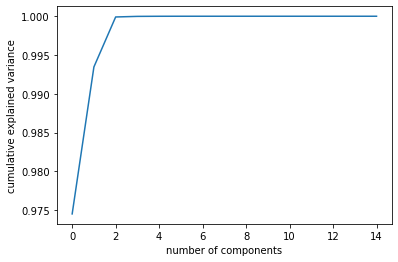

In [47]:
pca = PCA().fit(train_set_data, train_set_labels)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [21]:
df_with_ldct = df[['likes', 'title_views_dif' , 'number_of_tags', 'class']]

              precision    recall  f1-score   support

         0.0       0.38      0.97      0.55      1883
         1.0       0.31      0.50      0.38      3574
         2.0       0.50      0.07      0.12      3413
         3.0       0.52      0.11      0.18      2774

    accuracy                           0.36     11644
   macro avg       0.43      0.41      0.31     11644
weighted avg       0.43      0.36      0.29     11644

              precision    recall  f1-score   support

         0.0       0.91      0.15      0.26      1883
         1.0       0.59      0.32      0.41      3574
         2.0       0.33      0.89      0.49      3413
         3.0       0.50      0.05      0.08      2774

    accuracy                           0.40     11644
   macro avg       0.58      0.35      0.31     11644
weighted avg       0.54      0.40      0.33     11644



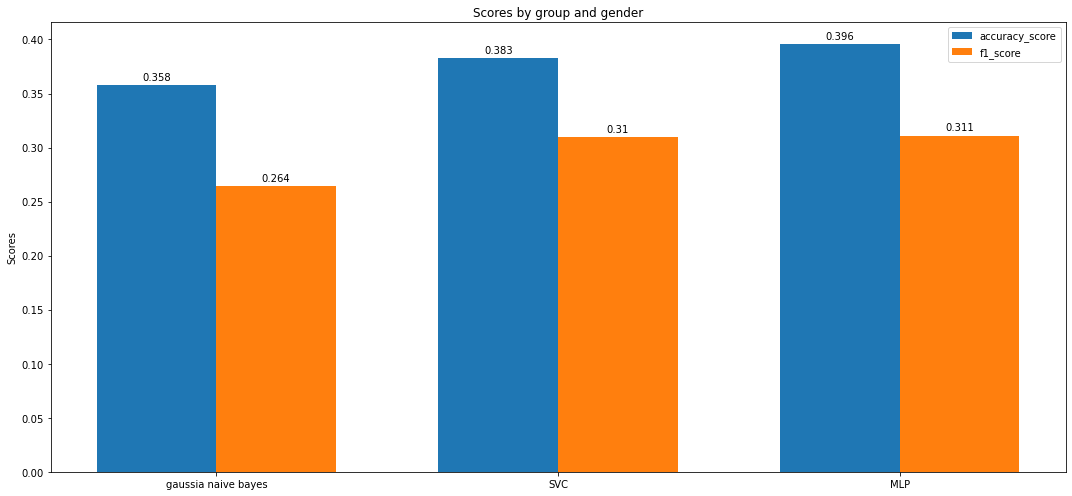

In [22]:
train_set_random,  test_set_random = train_test_split(df_with_ldct.copy(), test_size = 0.3, random_state= seed_value)
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = seed_value)
for train_index,test_index in split.split(df_with_ldct,df_with_ldct["class"]):
    train_set_strat = df_with_ldct.copy().loc[train_index]
    test_set_strat = df_with_ldct.copy().loc[test_index]
    
Overall = []
Random_Train = []
Stratified_Train = []
Random_Error = []
Strat_Error = []
for i in range(4):
    Overall.append((df_with_ldct["class"].value_counts()/len(df_with_ldct))[i])
    Random_Train.append((train_set_random["class"].value_counts()/len(train_set_random))[i])
    Stratified_Train.append((train_set_strat["class"].value_counts()/len(train_set_strat))[i])
    Random_Error.append((Overall[i]-Random_Train[i])/Overall[i]*100)
    Strat_Error.append((Overall[i]-Stratified_Train[i])/Overall[i]*100)
Class = np.array([0, 1 , 2, 3]).reshape(4,1)
Overall = np.array(Overall).reshape(4,1)
Random_Train = np.array(Random_Train).reshape(4,1)
Stratified_Train = np.array(Stratified_Train).reshape(4,1)
Random_Error = np.array(Random_Error).reshape(4,1)
Strat_Error = np.array(Strat_Error).reshape(4,1)
data_prep = np.concatenate((Class, Overall,Stratified_Train,Random_Train,Strat_Error,Random_Error,),axis = 1)
headers = ["Class", "Overall", "Stratified", "Random", "Strat_%Error", "Random_%Erro"]
df_prep = pd.DataFrame(data_prep,columns = headers)
df_prep
train_set = train_set_strat.copy()
test_set =test_set_strat.copy()
train_set_data = train_set.copy().drop(columns = 'class')
train_set_labels = train_set.copy()["class"]
test_set_data = test_set.copy().drop(columns = 'class')
test_set_labels = test_set.copy()["class"]
## We tested out 3 classifiers and ranked them: 
    
### A. Naive Bays classifier
response_accuracy = {}
response_f1_score = {}
# Import submodule.
from sklearn.naive_bayes import GaussianNB
# Initialize the gnb classifier object.
gnb = GaussianNB()
# Fit the training data to the classifier, in this case it is the evaluation of the mean and the std of each feature.
model = gnb.fit(train_set_data, train_set_labels)
y_pred = model.predict(test_set_data)
print(classification_report(test_set_labels, y_pred))
# Estimate the accuracy and the f1_score.
response_accuracy['gaussia naive bayes'] = round(gnb.score(test_set_data, test_set_labels),3)
response_f1_score['gaussian naive bayes'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)
### Β. Support-Vector-Machine Classifier
from sklearn.svm import SVC # "Support vector classifier"
svmC = SVC()
svmC.fit(train_set_data, train_set_labels)
y_pred = svmC.predict(test_set_data)
response_accuracy['SVC'] = round(svmC.score(test_set_data, test_set_labels),3)
response_f1_score['SVC'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)

### C. MLP Classifier
from sklearn.neural_network import MLPClassifier

mlpClf = MLPClassifier()
mlpClf.fit(train_set_data, train_set_labels)
y_pred = mlpClf.predict(test_set_data)
response_accuracy['MLP'] = round(mlpClf.score(test_set_data, test_set_labels),3)
response_f1_score['MLP'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)
print(classification_report(test_set_labels, y_pred))
accuracy_sorted_keys = sorted(response_accuracy, key=response_accuracy.get)  # [1, 3, 2]
accuracy_sorted_dict = {}
for w in accuracy_sorted_keys:
    accuracy_sorted_dict[w] = response_accuracy[w]

names = list(accuracy_sorted_dict.keys())
accuracy_values = list(accuracy_sorted_dict.values())
f1score_sorted_keys = sorted(response_f1_score, key=response_f1_score.get)  # [1, 3, 2]
f1score_sorted_dict = {}
for w in f1score_sorted_keys:
    f1score_sorted_dict[w] = response_f1_score[w]
    
f1_score_values = list(f1score_sorted_dict.values())
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,7))
rects1 = ax.bar(x - width/2, accuracy_values, width, label='accuracy_score')
rects2 = ax.bar(x + width/2, f1_score_values, width, label='f1_score')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

C:\Users\orfea\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orfea\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orfea\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1883
         1.0       0.75      0.01      0.01      3574
         2.0       0.38      0.10      0.16      3413
         3.0       0.25      0.95      0.39      2774

    accuracy                           0.26     11644
   macro avg       0.34      0.27      0.14     11644
weighted avg       0.40      0.26      0.14     11644



C:\Users\orfea\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orfea\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orfea\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

         0.0       0.48      0.14      0.22      1883
         1.0       0.37      0.56      0.45      3574
         2.0       0.00      0.00      0.00      3413
         3.0       0.26      0.53      0.35      2774

    accuracy                           0.32     11644
   macro avg       0.28      0.31      0.25     11644
weighted avg       0.25      0.32      0.26     11644



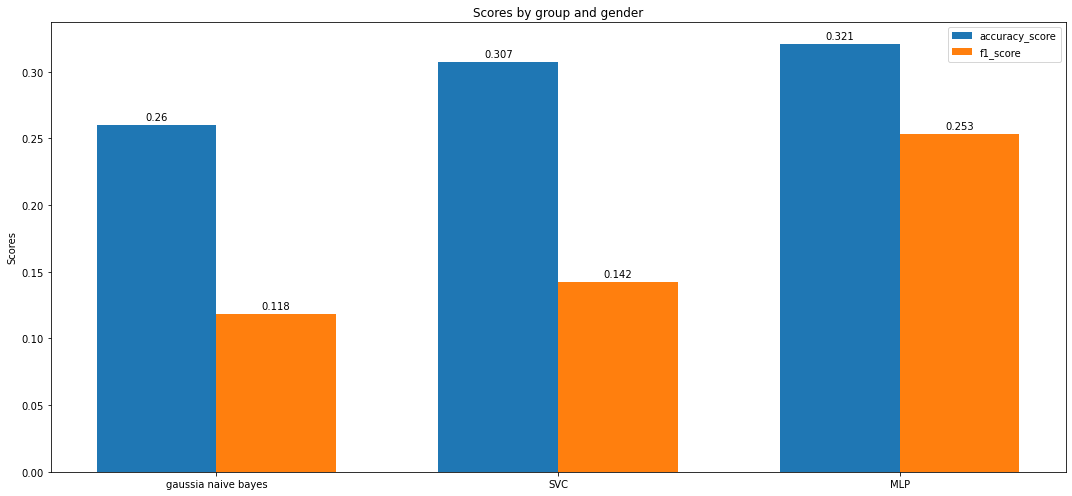

In [27]:
df_with_ldct = df[['days_till_trending', 'class']]
train_set_random,  test_set_random = train_test_split(df_with_ldct.copy(), test_size = 0.3, random_state= seed_value)
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = seed_value)
for train_index,test_index in split.split(df_with_ldct,df_with_ldct["class"]):
    train_set_strat = df_with_ldct.copy().loc[train_index]
    test_set_strat = df_with_ldct.copy().loc[test_index]
    
Overall = []
Random_Train = []
Stratified_Train = []
Random_Error = []
Strat_Error = []
for i in range(4):
    Overall.append((df_with_ldct["class"].value_counts()/len(df_with_ldct))[i])
    Random_Train.append((train_set_random["class"].value_counts()/len(train_set_random))[i])
    Stratified_Train.append((train_set_strat["class"].value_counts()/len(train_set_strat))[i])
    Random_Error.append((Overall[i]-Random_Train[i])/Overall[i]*100)
    Strat_Error.append((Overall[i]-Stratified_Train[i])/Overall[i]*100)
Class = np.array([0, 1 , 2, 3]).reshape(4,1)
Overall = np.array(Overall).reshape(4,1)
Random_Train = np.array(Random_Train).reshape(4,1)
Stratified_Train = np.array(Stratified_Train).reshape(4,1)
Random_Error = np.array(Random_Error).reshape(4,1)
Strat_Error = np.array(Strat_Error).reshape(4,1)
data_prep = np.concatenate((Class, Overall,Stratified_Train,Random_Train,Strat_Error,Random_Error,),axis = 1)
headers = ["Class", "Overall", "Stratified", "Random", "Strat_%Error", "Random_%Erro"]
df_prep = pd.DataFrame(data_prep,columns = headers)
df_prep
train_set = train_set_strat.copy()
test_set =test_set_strat.copy()
train_set_data = train_set.copy().drop(columns = 'class')
train_set_labels = train_set.copy()["class"]
test_set_data = test_set.copy().drop(columns = 'class')
test_set_labels = test_set.copy()["class"]
## We tested out 3 classifiers and ranked them: 
    
### A. Naive Bays classifier
response_accuracy = {}
response_f1_score = {}
# Import submodule.
from sklearn.naive_bayes import GaussianNB
# Initialize the gnb classifier object.
gnb = GaussianNB()
# Fit the training data to the classifier, in this case it is the evaluation of the mean and the std of each feature.
model = gnb.fit(train_set_data, train_set_labels)
y_pred = model.predict(test_set_data)
print(classification_report(test_set_labels, y_pred))
# Estimate the accuracy and the f1_score.
response_accuracy['gaussia naive bayes'] = round(gnb.score(test_set_data, test_set_labels),3)
response_f1_score['gaussian naive bayes'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)
### Β. Support-Vector-Machine Classifier
from sklearn.svm import SVC # "Support vector classifier"
svmC = SVC()
svmC.fit(train_set_data, train_set_labels)
y_pred = svmC.predict(test_set_data)
response_accuracy['SVC'] = round(svmC.score(test_set_data, test_set_labels),3)
response_f1_score['SVC'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)

### C. MLP Classifier
from sklearn.neural_network import MLPClassifier

mlpClf = MLPClassifier()
mlpClf.fit(train_set_data, train_set_labels)
y_pred = mlpClf.predict(test_set_data)
response_accuracy['MLP'] = round(mlpClf.score(test_set_data, test_set_labels),3)
response_f1_score['MLP'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)
print(classification_report(test_set_labels, y_pred))
accuracy_sorted_keys = sorted(response_accuracy, key=response_accuracy.get)  # [1, 3, 2]
accuracy_sorted_dict = {}
for w in accuracy_sorted_keys:
    accuracy_sorted_dict[w] = response_accuracy[w]

names = list(accuracy_sorted_dict.keys())
accuracy_values = list(accuracy_sorted_dict.values())
f1score_sorted_keys = sorted(response_f1_score, key=response_f1_score.get)  # [1, 3, 2]
f1score_sorted_dict = {}
for w in f1score_sorted_keys:
    f1score_sorted_dict[w] = response_f1_score[w]
    
f1_score_values = list(f1score_sorted_dict.values())
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,7))
rects1 = ax.bar(x - width/2, accuracy_values, width, label='accuracy_score')
rects2 = ax.bar(x + width/2, f1_score_values, width, label='f1_score')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

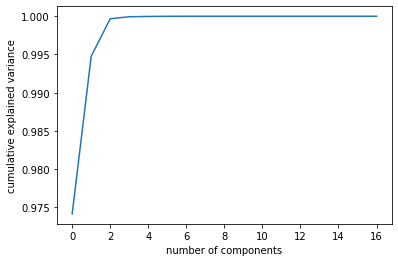

              precision    recall  f1-score   support

         0.0       0.26      0.98      0.41      1883
         1.0       0.86      0.01      0.01      3574
         2.0       0.44      0.14      0.21      3413
         3.0       0.31      0.37      0.34      2774

    accuracy                           0.29     11644
   macro avg       0.47      0.38      0.24     11644
weighted avg       0.51      0.29      0.21     11644

              precision    recall  f1-score   support

         0.0       0.38      0.42      0.40      1883
         1.0       0.59      0.82      0.68      3574
         2.0       0.56      0.31      0.40      3413
         3.0       0.67      0.65      0.66      2774

    accuracy                           0.56     11644
   macro avg       0.55      0.55      0.53     11644
weighted avg       0.56      0.56      0.55     11644



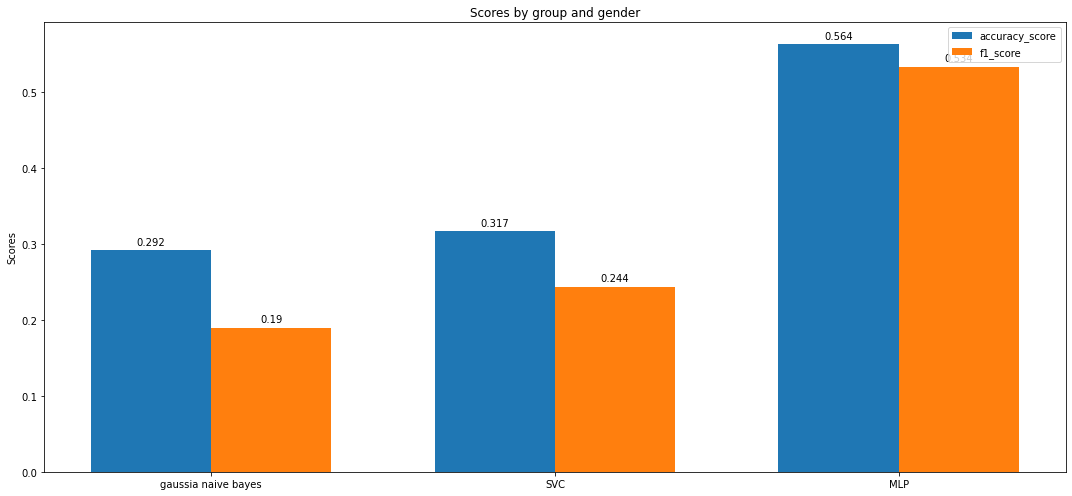

In [7]:
df_with_ldct = df[['days_till_trending',
       'number_of_tags', 'title_number_of_trending_times',
       'video_id_number_of_trending_times', 'title_dislikedf',
       'video_id_likedf', 'video_id_dislikedf', 'title_tagsdif',
       'video_id_tagsdif', 'title_time_dif', 'title_views_dif',
       'video_id_time_dif', 'video_id_views_dif', 'title_comment_count_dif',
       'video_id_comment_count_dif', 'comments_to_views', 'likes_to_dislikes',
       'class']]


train_set_random,  test_set_random = train_test_split(df_with_ldct.copy(), test_size = 0.3, random_state= seed_value)
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = seed_value)
for train_index,test_index in split.split(df_with_ldct,df_with_ldct["class"]):
    train_set_strat = df_with_ldct.copy().loc[train_index]
    test_set_strat = df_with_ldct.copy().loc[test_index]
    
Overall = []
Random_Train = []
Stratified_Train = []
Random_Error = []
Strat_Error = []
for i in range(4):
    Overall.append((df_with_ldct["class"].value_counts()/len(df_with_ldct))[i])
    Random_Train.append((train_set_random["class"].value_counts()/len(train_set_random))[i])
    Stratified_Train.append((train_set_strat["class"].value_counts()/len(train_set_strat))[i])
    Random_Error.append((Overall[i]-Random_Train[i])/Overall[i]*100)
    Strat_Error.append((Overall[i]-Stratified_Train[i])/Overall[i]*100)
Class = np.array([0, 1 , 2, 3]).reshape(4,1)
Overall = np.array(Overall).reshape(4,1)
Random_Train = np.array(Random_Train).reshape(4,1)
Stratified_Train = np.array(Stratified_Train).reshape(4,1)
Random_Error = np.array(Random_Error).reshape(4,1)
Strat_Error = np.array(Strat_Error).reshape(4,1)
data_prep = np.concatenate((Class, Overall,Stratified_Train,Random_Train,Strat_Error,Random_Error,),axis = 1)
headers = ["Class", "Overall", "Stratified", "Random", "Strat_%Error", "Random_%Erro"]
df_prep = pd.DataFrame(data_prep,columns = headers)
df_prep
train_set = train_set_strat.copy()
test_set =test_set_strat.copy()
train_set_data = train_set.copy().drop(columns = 'class')
train_set_labels = train_set.copy()["class"]
test_set_data = test_set.copy().drop(columns = 'class')
test_set_labels = test_set.copy()["class"]
## We tested out 3 classifiers and ranked them: 
pca = PCA().fit(train_set_data, train_set_labels)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
### A. Naive Bays classifier
response_accuracy = {}
response_f1_score = {}
# Import submodule.
from sklearn.naive_bayes import GaussianNB
# Initialize the gnb classifier object.
gnb = GaussianNB()
# Fit the training data to the classifier, in this case it is the evaluation of the mean and the std of each feature.
model = gnb.fit(train_set_data, train_set_labels)
y_pred = model.predict(test_set_data)
print(classification_report(test_set_labels, y_pred))
# Estimate the accuracy and the f1_score.
response_accuracy['gaussia naive bayes'] = round(gnb.score(test_set_data, test_set_labels),3)
response_f1_score['gaussian naive bayes'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)
### Β. Support-Vector-Machine Classifier
from sklearn.svm import SVC # "Support vector classifier"
svmC = SVC()
svmC.fit(train_set_data, train_set_labels)
y_pred = svmC.predict(test_set_data)
response_accuracy['SVC'] = round(svmC.score(test_set_data, test_set_labels),3)
response_f1_score['SVC'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)

### C. MLP Classifier
from sklearn.neural_network import MLPClassifier

mlpClf = MLPClassifier()
mlpClf.fit(train_set_data, train_set_labels)
y_pred = mlpClf.predict(test_set_data)
response_accuracy['MLP'] = round(mlpClf.score(test_set_data, test_set_labels),3)
response_f1_score['MLP'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)
print(classification_report(test_set_labels, y_pred))


#plotting

accuracy_sorted_keys = sorted(response_accuracy, key=response_accuracy.get)  # [1, 3, 2]
accuracy_sorted_dict = {}
for w in accuracy_sorted_keys:
    accuracy_sorted_dict[w] = response_accuracy[w]

names = list(accuracy_sorted_dict.keys())
accuracy_values = list(accuracy_sorted_dict.values())
f1score_sorted_keys = sorted(response_f1_score, key=response_f1_score.get)  # [1, 3, 2]
f1score_sorted_dict = {}
for w in f1score_sorted_keys:
    f1score_sorted_dict[w] = response_f1_score[w]
    
f1_score_values = list(f1score_sorted_dict.values())
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,7))
rects1 = ax.bar(x - width/2, accuracy_values, width, label='accuracy_score')
rects2 = ax.bar(x + width/2, f1_score_values, width, label='f1_score')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

C:\Users\orfea\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orfea\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\orfea\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

         0.0       0.32      0.97      0.49      1412
         1.0       0.36      0.43      0.39      2209
         2.0       0.25      0.00      0.00      1840
         3.0       0.00      0.00      0.00      1405

    accuracy                           0.34      6866
   macro avg       0.23      0.35      0.22      6866
weighted avg       0.25      0.34      0.23      6866

              precision    recall  f1-score   support

         0.0       0.30      1.00      0.46      1412
         1.0       0.38      0.00      0.00      2209
         2.0       0.39      0.11      0.17      1840
         3.0       0.23      0.26      0.24      1405

    accuracy                           0.29      6866
   macro avg       0.32      0.34      0.22      6866
weighted avg       0.34      0.29      0.19      6866



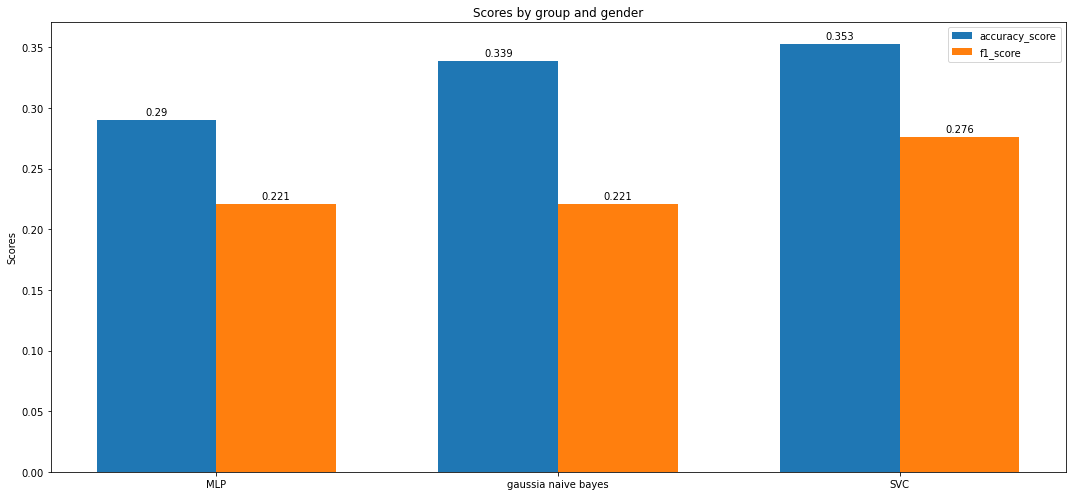

In [48]:
pca = PCA(n_components=3)
train_set_data_pca = pca.fit_transform(train_set_data)
test_set_data_pca = pca.transform(test_set_data)

model = gnb.fit(train_set_data_pca , train_set_labels)
y_pred = model.predict(test_set_data_pca)
print(classification_report(test_set_labels, y_pred))
# Estimate the accuracy and the f1_score.
response_accuracy['gaussia naive bayes'] = round(gnb.score(test_set_data_pca, test_set_labels),3)
response_f1_score['gaussian naive bayes'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)
### Β. Support-Vector-Machine Classifier
from sklearn.svm import SVC # "Support vector classifier"
svmC = SVC()
svmC.fit(train_set_data_pca, train_set_labels)
y_pred = svmC.predict(test_set_data_pca)
response_accuracy['SVC'] = round(svmC.score(test_set_data_pca, test_set_labels),3)
response_f1_score['SVC'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)
# pipe = Pipeline([('scale', scaler),('pca', pca),('classifier',model)])
# pipe.fit(x_train,train_set_labels)
mlpClf = MLPClassifier()
mlpClf.fit(train_set_data_pca, train_set_labels)
y_pred = mlpClf.predict(test_set_data_pca)
response_accuracy['MLP'] = round(mlpClf.score(test_set_data_pca, test_set_labels),3)
response_f1_score['MLP'] = round(f1_score(test_set_labels,y_pred, average='macro'),3)
print(classification_report(test_set_labels, y_pred))
#plotting

accuracy_sorted_keys = sorted(response_accuracy, key=response_accuracy.get)  # [1, 3, 2]
accuracy_sorted_dict = {}
for w in accuracy_sorted_keys:
    accuracy_sorted_dict[w] = response_accuracy[w]

names = list(accuracy_sorted_dict.keys())
accuracy_values = list(accuracy_sorted_dict.values())
f1score_sorted_keys = sorted(response_f1_score, key=response_f1_score.get)  # [1, 3, 2]
f1score_sorted_dict = {}
for w in f1score_sorted_keys:
    f1score_sorted_dict[w] = response_f1_score[w]
    
f1_score_values = list(f1score_sorted_dict.values())
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,7))
rects1 = ax.bar(x - width/2, accuracy_values, width, label='accuracy_score')
rects2 = ax.bar(x + width/2, f1_score_values, width, label='f1_score')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [ ]:
accuracy_score = -cross_val_score(pipe, train_set_data, train_set_labels, cv=10,scoring='accuracy').mean() # - because we want to "minimize" this metric so like gradient descent we take the minus. 
f1_score = -cross_val_score(pipe, train_set_data, train_set_labels, cv=10,scoring='f1_macro').mean()

print("Train Score:",pipe.score(x_train,train_set_labels))
print("\n=================")
accuracy_score, f1_score

In [71]:
#first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(19, input_dim=19, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit( train_set_data, train_set_labels, epochs=10, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(test_set_data, test_set_labels)

Epoch 1/10
1602/1602 [==============================] - 2s 1ms/step - loss: 1.7541e-07 - accuracy: 0.3217
Epoch 2/10
1602/1602 [==============================] - 3s 2ms/step - loss: 1.7541e-07 - accuracy: 0.3217
Epoch 3/10
1602/1602 [==============================] - 3s 2ms/step - loss: 1.7541e-07 - accuracy: 0.3217
Epoch 4/10
1602/1602 [==============================] - 3s 2ms/step - loss: 1.7541e-07 - accuracy: 0.3217
Epoch 5/10
1602/1602 [==============================] - 3s 2ms/step - loss: 1.7541e-07 - accuracy: 0.3217
Epoch 6/10
1602/1602 [==============================] - 3s 2ms/step - loss: 1.7541e-07 - accuracy: 0.3217
Epoch 7/10
1602/1602 [==============================] - 3s 2ms/step - loss: 1.7541e-07 - accuracy: 0.3217
Epoch 8/10
1602/1602 [==============================] - 3s 2ms/step - loss: 1.7541e-07 - accuracy: 0.3217
Epoch 9/10
1602/1602 [==============================] - 2s 2ms/step - loss: 1.7541e-07 - accuracy: 0.3217
Epoch 10/10
215/215 [=========================

In [72]:
accuracy

0.32173025608062744

In [73]:
predictions = (model.predict(test_set_data) > 0.5).astype(int)
for i in range(5):
	print('%s => %d (expected %d)' % (test_set_data[i].tolist(), predictions[i], test_set_labels[i]))

KeyError: 0